In [2]:
# Celem projektu jest porównanie szybkości i efektywności działania 2 algorytmów
# sortujących (QuickSort i MergeSort) doświadczalnie, czyli na podstawie przeprowadzonych eksperymentów. W tym celu: 

In [3]:
import random
import time
import matplotlib.pyplot as plt

In [4]:
# PODSTAWOWY ALGORYTM MERGESORT
def Merge(lista, left, pivot, right): # scala 2 posortowane listy
    i = left
    j = pivot+1
    helper = []
    for k in range(left, right+1):
        if j>right or (lista[i] <= lista[j] and i<=pivot):
            helper.append(lista[i])
            i+=1
        else:
            helper.append(lista[j])
            j+=1
    
    for k in range(len(helper)):
        lista[left+k] = helper[k] # wypełniamy oryginalną listę posortowanymi wartościami od left do right
    return lista

def MergeSort(lista, left, right): # sortuje metodą merge(przez scalanie)
    if left >= right:
        return lista
    middle = (left + right) // 2
    MergeSort(lista, left, middle)
    MergeSort(lista, middle+1, right)
    Merge(lista, left, middle, right)
    return lista

In [5]:
# PODSTAWOWY ALGORYTM QUICKSORT

# pivotem jest prawy kraniec
def partitionRight(lista,left,right):
    pivot = lista[right]
    j = left
    for i in range(left, right):
        if lista[i] <= pivot:
            lista[i],lista[j] = lista[j], lista[i]
            j += 1
    lista[j],lista[right] = lista[right],lista[j]               
    return j

def quick_sort(lista, left, right):
    if left >= right:
        return lista
    pivot = partitionRight(lista,left,right)
    quick_sort(lista, left, pivot-1)
    quick_sort(lista, pivot+1, right)
    return lista

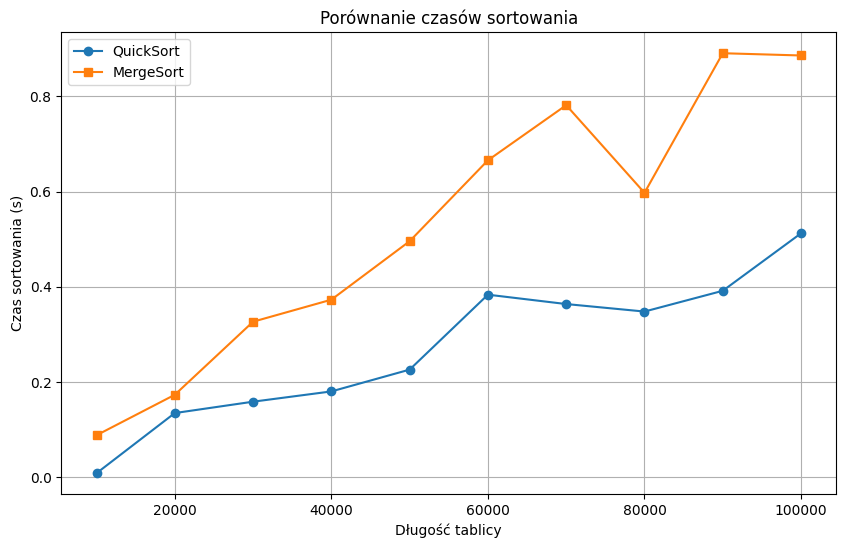

In [38]:
# A: podstawowy test sprawdzenia szybkości algorytmów MergeSort i QuickSort. n - długość tablicy, użyję następującego ciągu arytmetycznego:
# n∈{10000,20000,30000,...,100000}

dlugosci = list(range(10000, 100001, 10000))
czasy_quick = []
czasy_merge = []

for n in dlugosci:
    lista = [random.randint(1, 1000000) for _ in range(n)]
    
    kopia = lista[:]
    start = time.time()
    quick_sort(kopia, 0, len(kopia) - 1)
    czasy_quick.append(time.time() - start)

    kopia = lista[:]
    start = time.time()
    MergeSort(kopia,0, len(kopia)-1)
    czasy_merge.append(time.time() - start)
    
plt.figure(figsize=(10, 6))
plt.plot(dlugosci, czasy_quick, label='QuickSort', marker='o')
plt.plot(dlugosci, czasy_merge, label='MergeSort', marker='s')

plt.title('Porównanie czasów sortowania')
plt.xlabel('Długość tablicy')
plt.ylabel('Czas sortowania (s)')
plt.legend()
plt.grid(True) #linie siatki
plt.show()

In [7]:
# Jak widać z wykresu 1 dla stosunkowo krótkich tablic MergeSort i QuickSort sprawdzają się jednakowo dobrze.
# Jednak ze zwiększeniem długości tablic, MergeSort zaczyna znacznie przegrywać
# w szybkości. Zaczynając od 30000 i wyżej QuickSort jest co najmniej 2 razy szybszy niż MergeSort.

In [8]:
# Teraz sprawdzimy dla wąskiego zakresu. W tym celu wprowadźmy funkcję QuickSort która będzie obsługiwać sortowanie 
# wartości z wąskiego zakresu bez błędu nadmiernej rekurencji. Poniższy algorytm dzieli listę nie na 2 ale na 3 części:
# <pivot, =pivot, >pivot.

In [9]:
def partitionThree(lista,left,right):
    pivot = lista[right]
    i = left
    while i < right:
        if lista[i] < pivot:
            lista[i],lista[left] = lista[left], lista[i]
            left += 1
            i += 1
        elif lista[i] > pivot:
            lista[i], lista[right] = lista[right], lista[i]
            right -= 1
        else:
            i += 1
                                     
    return lista, left, right
# left - zaczynają się wartości równe pivotowi. right - kończą się wartości równe pivotowi
# poniższy algorytm sortuje tylko 2 częsci listy, gdzie wartości są mniejsze albo większe od pivota
def quick_sort3(lista, left, right):
    if left >= right:
        return lista
    arr, i , j = partitionThree(lista,left,right)
    quick_sort3(lista, left, i-1)
    quick_sort3(lista, j+1, right)
    return lista

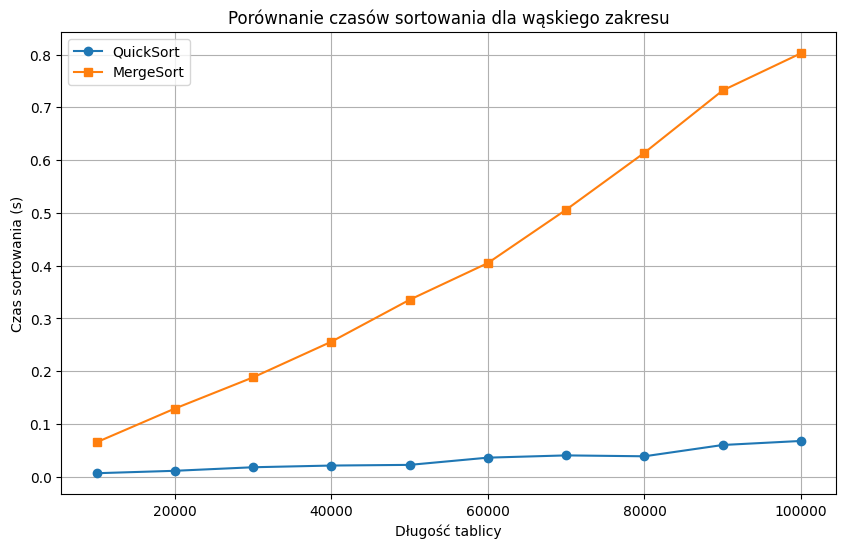

In [10]:
# EKSPERYMENT
dlugosci = list(range(10000, 100001, 10000))
czasy_quick = []
czasy_merge = []

for n in dlugosci:
    lista = [random.randint(1, 5) for _ in range(n)]
    
    kopia = lista[:]
    start = time.time()
    quick_sort3(kopia, 0, len(kopia) - 1)
    czasy_quick.append(time.time() - start)

    kopia = lista[:]
    start = time.time()
    MergeSort(kopia,0, len(kopia)-1)
    czasy_merge.append(time.time() - start)
    
plt.figure(figsize=(10, 6))
plt.plot(dlugosci, czasy_quick, label='QuickSort', marker='o')
plt.plot(dlugosci, czasy_merge, label='MergeSort', marker='s')

plt.title('Porównanie czasów sortowania dla wąskiego zakresu')
plt.xlabel('Długość tablicy')
plt.ylabel('Czas sortowania (s)')
plt.legend()
plt.grid(True) #linie siatki
plt.show()

In [11]:
# Dla wąskiego zakresu szybkość MergeSort rośnie liniowo, natomiast czasy QuickSort3 oscylują zawsze w tym samym przedziale.

In [12]:
# B - policzyć odchylenie standardowe csazu sortowania MergeSort i QuickSort. Niech n = 50000 (długość tabeli), k = 30 (ilość prób).

In [13]:
czasy_quick = []
czasy_merge = []

for _ in range(30):
    lista = [random.randint(1, 100000) for _ in range(50000)]
    
    kopia = lista[:]
    start = time.time()
    quick_sort(kopia, 0, len(kopia) - 1)
    czasy_quick.append(time.time() - start)
    
    kopia = lista[:]
    start = time.time()
    MergeSort(kopia, 0, len(kopia) - 1)
    czasy_merge.append(time.time() - start)

# Średnie czasy
srednia1 = sum(czasy_quick) / len(czasy_quick)
srednia2 = sum(czasy_merge) / len(czasy_merge)

# Suma kwadratów różnic
suma_kw_roznic1 = sum((i - srednia1)**2 for i in czasy_quick)
suma_kw_roznic2 = sum((j - srednia2)**2 for j in czasy_merge)

# Odchylenie standardowe
odch_st1 = (suma_kw_roznic1 / len(czasy_quick))**0.5
odch_st2 = (suma_kw_roznic2 / len(czasy_merge))**0.5

print(f"Odchylenie standardowe QuickSort: {odch_st1:.6f} sekundy") 
print(f"Odchylenie standardowe MergeSort: {odch_st2:.6f} sekundy")


Odchylenie standardowe QuickSort: 0.013882 sekundy
Odchylenie standardowe MergeSort: 0.030674 sekundy


In [14]:
# QuickSort pokazuje mniejsze odchylenie standardowe, co oznacza, że z większą dokładnością możemy przewidzieć czas działania algorytmu
# QuickSort, niż MergeSort.

In [15]:
# C - wspieranie InsertSortem na krótkich dystansach.
# Dla małych długości tabel InsertSort jest bardziej efektywny niż QuickSort albo MergeSort. Zatem możemy wprowadzić
# hybrydową wersję tych 2 algorytmów, która dla małych długości będzie korzystać z InsertSorta, a dla wielkich długości
# będzie działać normalnie.

In [16]:
def InsertSort(L):
    for i in range(1, len(L)):
        key = L[i]
        j = i - 1
        while j >= 0 and key < L[j]:
            L[j+1] = L[j]
            j -= 1
        L[j+1] = key
    return L

In [17]:
# Najpierw trzeba ustalić co to jest ten "krótki dystans". Na początek ustawiam granicę krótkiego dystansu dla obu algorytmów na n = 100 i zobaczę
# jakie będą wyniki.

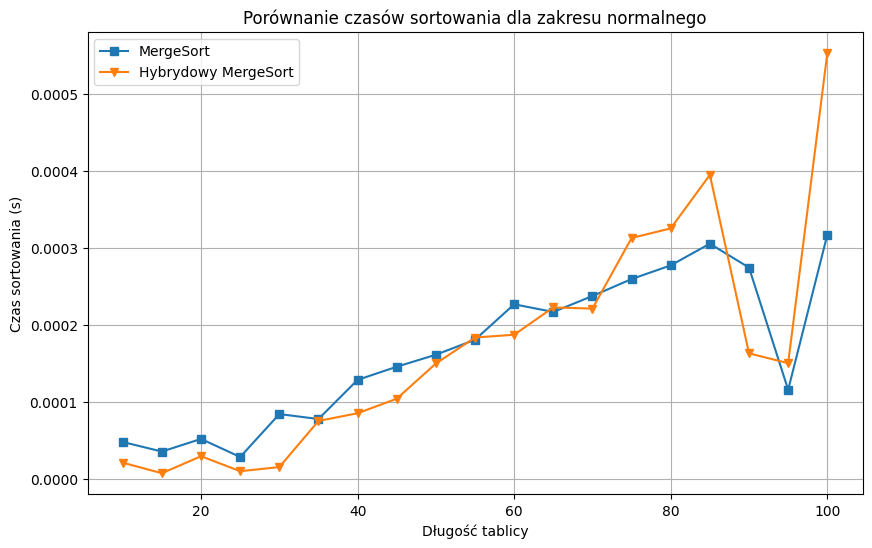

In [18]:
#NORMALNY PREZDZIAŁ MergeSort + InsertSort
def Hybryd_MergeSort(lista, left, right): 
    if left >= right:
        return lista
    elif right-left < 100:
        InsertSort(lista)
    else:
        middle = (left + right) // 2
        MergeSort(lista, left, middle)
        MergeSort(lista, middle+1, right)
        Merge(lista, left, middle, right)
    return lista

dlugosci = list(range(10, 101, 5))
czasy_merge = []
czasy_h_merge = []

for n in dlugosci:
    lista = [random.randint(1, 1000000) for _ in range(n)]

    kopia = lista[:]
    start = time.perf_counter()
    MergeSort(kopia,0, len(kopia)-1)
    czasy_merge.append(time.perf_counter() - start)
    
    kopia = lista[:]
    start = time.perf_counter()
    Hybryd_MergeSort(kopia,0, len(kopia)-1)
    czasy_h_merge.append(time.perf_counter() - start)

    
plt.figure(figsize=(10, 6))
plt.plot(dlugosci, czasy_merge, label='MergeSort', marker='s')
plt.plot(dlugosci, czasy_h_merge, label='Hybrydowy MergeSort', marker='v')

plt.title('Porównanie czasów sortowania dla zakresu normalnego')
plt.xlabel('Długość tablicy')
plt.ylabel('Czas sortowania (s)')
plt.legend()
plt.grid(True) #linie siatki
plt.show()

In [19]:
# Przeprowadzając kilkadziesiąt eksperymentów zauważyłam, że InsertSort jest szybszy niż MergeSort dla długości tablic n <= ~65 w kontekscie zakresu
# normalnego. Zatem dla dalszych eksperymentów ustawiam granicę pomiędzy InsertSortem a MergeSortem na 65.

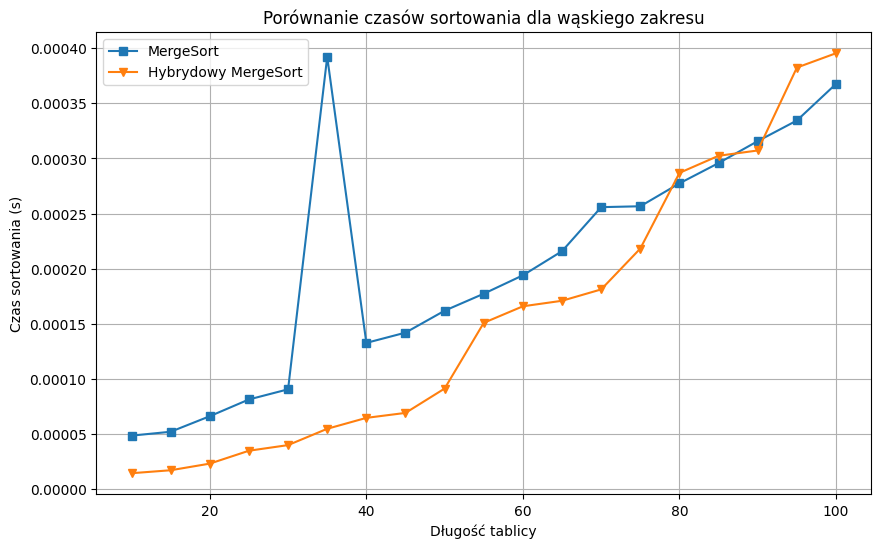

In [20]:
#WĄSKI ZAKRES MergeSort + InsertSort
def Hybryd_MergeSort(lista, left, right): 
    if left >= right:
        return lista
    elif right-left < 100:
        InsertSort(lista)
    else:
        middle = (left + right) // 2
        MergeSort(lista, left, middle)
        MergeSort(lista, middle+1, right)
        Merge(lista, left, middle, right)
    return lista

dlugosci = list(range(10, 101, 5))
czasy_merge = []
czasy_h_merge = []

for n in dlugosci:
    lista = [random.randint(1, 5) for _ in range(n)]

    kopia = lista[:]
    start = time.perf_counter()
    MergeSort(kopia,0, len(kopia)-1)
    czasy_merge.append(time.perf_counter() - start)
    
    kopia = lista[:]
    start = time.perf_counter()
    Hybryd_MergeSort(kopia,0, len(kopia)-1)
    czasy_h_merge.append(time.perf_counter() - start)

    
plt.figure(figsize=(10, 6))
plt.plot(dlugosci, czasy_merge, label='MergeSort', marker='s')
plt.plot(dlugosci, czasy_h_merge, label='Hybrydowy MergeSort', marker='v')

plt.title('Porównanie czasów sortowania dla wąskiego zakresu')
plt.xlabel('Długość tablicy')
plt.ylabel('Czas sortowania (s)')
plt.legend()
plt.grid(True) #linie siatki
plt.show()

In [21]:
# W przypadku wąskiego zakresu widzimy, że Hybrydowy MergeSort przestaje być efektywnym dla list o długości n > ~85. Zatem dla dalszych 
# eksperymentów ustawiam granicę na n = 85

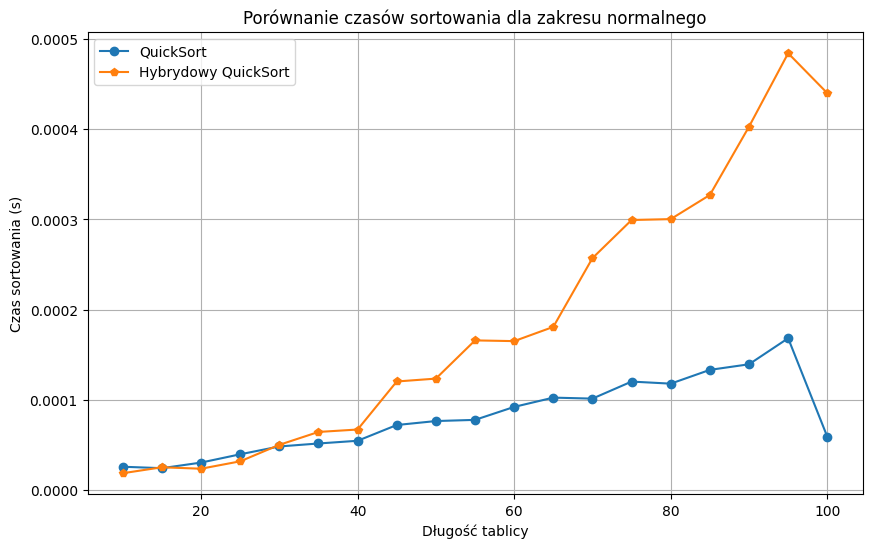

In [22]:
#NORMALNY ZAKRES QuickSort + InsertSort
def hybryd_quick_sort(lista, left, right):
    if left >= right:
        return lista
    elif right-left < 100:
        InsertSort(lista)
    else:
        pivot = partitionRight(lista,left,right)
        quick_sort(lista, left, pivot-1)
        quick_sort(lista, pivot+1, right)
    return lista
dlugosci = list(range(10, 101, 5))
czasy_quick = []
czasy_h_quick = []

for n in dlugosci:
    lista = [random.randint(1, 1000000) for _ in range(n)]
    
    kopia = lista[:]
    start = time.perf_counter()
    quick_sort(kopia, 0, len(kopia) - 1)
    czasy_quick.append(time.perf_counter() - start)
    
    kopia = lista[:]
    start = time.perf_counter()
    hybryd_quick_sort(kopia,0, len(kopia)-1)
    czasy_h_quick.append(time.perf_counter() - start)
    
    
plt.figure(figsize=(10, 6))
plt.plot(dlugosci, czasy_quick, label='QuickSort', marker='o')
plt.plot(dlugosci, czasy_h_quick, label='Hybrydowy QuickSort', marker='p')

plt.title('Porównanie czasów sortowania dla zakresu normalnego')
plt.xlabel('Długość tablicy')
plt.ylabel('Czas sortowania (s)')
plt.legend()
plt.grid(True) #linie siatki
plt.show()

In [23]:
# W przypadku QuickSort algorytm wspierany InsertSortem pokazuje dobre wyniki dla tablic o długości n <= ~20 w kontekście zakresu normalnego. 
# Zatem dla dalszych eksperymentów ustawiam granicę pomiędzy InsertSortem a QuickSortem na 20.

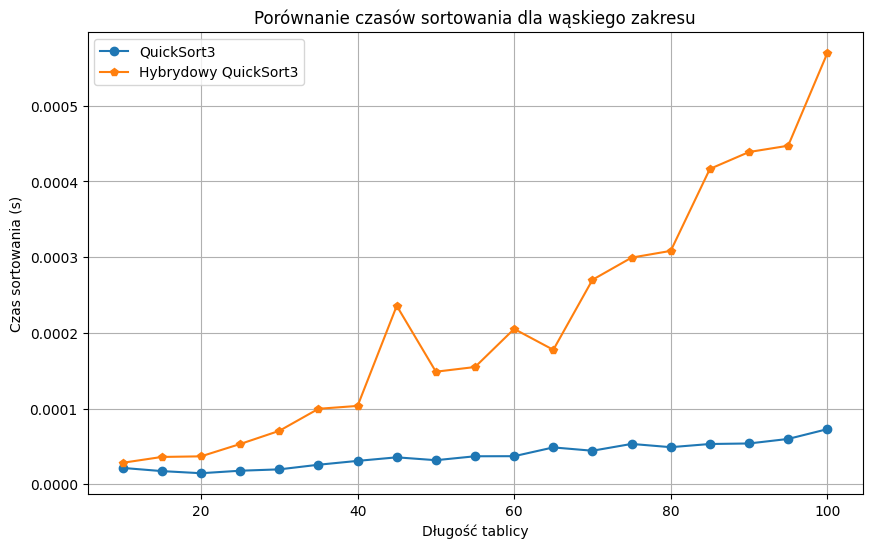

In [24]:
#WĄSKI ZAKRES QuickSort + InsertSort
def hybryd_quick_sort3(lista, left, right):
    if left >= right:
        return lista
    elif right-left < 100:
        InsertSort(lista)
    arr, i , j = partitionThree(lista,left,right)
    quick_sort3(lista, left, i-1)
    quick_sort3(lista, j+1, right)
    return lista
    
dlugosci = list(range(10, 101, 5))
czasy_quick3 = []
czasy_h_quick3 = []

for n in dlugosci:
    lista = [random.randint(1, 5) for _ in range(n)]
    
    kopia = lista[:]
    start = time.perf_counter()
    quick_sort3(kopia, 0, len(kopia) - 1)
    czasy_quick3.append(time.perf_counter() - start)
    
    kopia = lista[:]
    start = time.perf_counter()
    hybryd_quick_sort3(kopia,0, len(kopia)-1)
    czasy_h_quick3.append(time.perf_counter() - start)
    
    
plt.figure(figsize=(10, 6))
plt.plot(dlugosci, czasy_quick3, label='QuickSort3', marker='o')
plt.plot(dlugosci, czasy_h_quick3, label='Hybrydowy QuickSort3', marker='p')

plt.title('Porównanie czasów sortowania dla wąskiego zakresu')
plt.xlabel('Długość tablicy')
plt.ylabel('Czas sortowania (s)')
plt.legend()
plt.grid(True) #linie siatki
plt.show()

In [25]:
# Z powyższego wykresu widać, że QuickSort wspierany InsertSortem dla wąskiego zakresu jest zawsze wolniejszy niż zwykły 
# QuickSort. Zatem granice pozostawiam bez zmian.

In [26]:
# Zmieniam granice:
def Hybryd_MergeSort(lista, left, right): 
    if left >= right:
        return lista
    elif right-left < 66:
        InsertSort(lista)
    else:
        middle = (left + right) // 2
        MergeSort(lista, left, middle)
        MergeSort(lista, middle+1, right)
        Merge(lista, left, middle, right)
    return lista

def Hybryd_MergeSort_w(lista, left, right): # funkcja MergeSort dla wąskiego zakresu
    if left >= right:
        return lista
    elif right-left < 86:
        InsertSort(lista)
    else:
        middle = (left + right) // 2
        MergeSort(lista, left, middle)
        MergeSort(lista, middle+1, right)
        Merge(lista, left, middle, right)
    return lista

def hybryd_quick_sort(lista, left, right):
    if left >= right:
        return lista
    elif right-left < 21:
        InsertSort(lista)
    else:
        pivot = partitionRight(lista,left,right)
        quick_sort(lista, left, pivot-1)
        quick_sort(lista, pivot+1, right)
    return lista


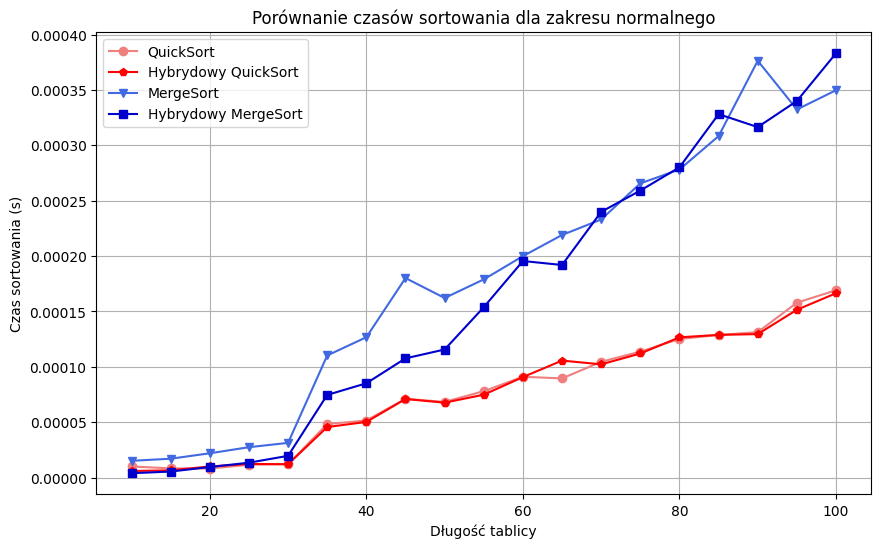

In [27]:
czasy_quick = []
czasy_h_quick = []
czasy_merge = []
czasy_h_merge = []

dlugosci = list(range(10, 101, 5))

for n in dlugosci:
    lista = [random.randint(1, 1000000) for _ in range(n)]
    
    kopia = lista[:]
    start = time.perf_counter()
    quick_sort(kopia, 0, len(kopia) - 1)
    czasy_quick.append(time.perf_counter() - start)
    
    kopia = lista[:]
    start = time.perf_counter()
    hybryd_quick_sort(kopia,0, len(kopia)-1)
    czasy_h_quick.append(time.perf_counter() - start)
    
    kopia = lista[:]
    start = time.perf_counter()
    Hybryd_MergeSort(kopia,0, len(kopia)-1)
    czasy_h_merge.append(time.perf_counter() - start)

    kopia = lista[:]
    start = time.perf_counter()
    MergeSort(kopia,0, len(kopia)-1)
    czasy_merge.append(time.perf_counter() - start)
    
      
plt.figure(figsize=(10, 6))
plt.plot(dlugosci, czasy_quick, label='QuickSort', marker='o',color='lightcoral')
plt.plot(dlugosci, czasy_h_quick, label='Hybrydowy QuickSort', marker='p',color='red')
plt.plot(dlugosci, czasy_merge, label='MergeSort', marker='v',color='royalblue' )
plt.plot(dlugosci, czasy_h_merge, label='Hybrydowy MergeSort', marker='s',color='mediumblue')

plt.title('Porównanie czasów sortowania dla zakresu normalnego')
plt.xlabel('Długość tablicy')
plt.ylabel('Czas sortowania (s)')
plt.legend()
plt.grid(True) #linie siatki
plt.show()

In [28]:
# Jak widać z powyższego wykresu najbardziej efektywnym algorytmem sortowania dla zakresu normalnego w tym przypadku jest Hybrydowy QuickSort.

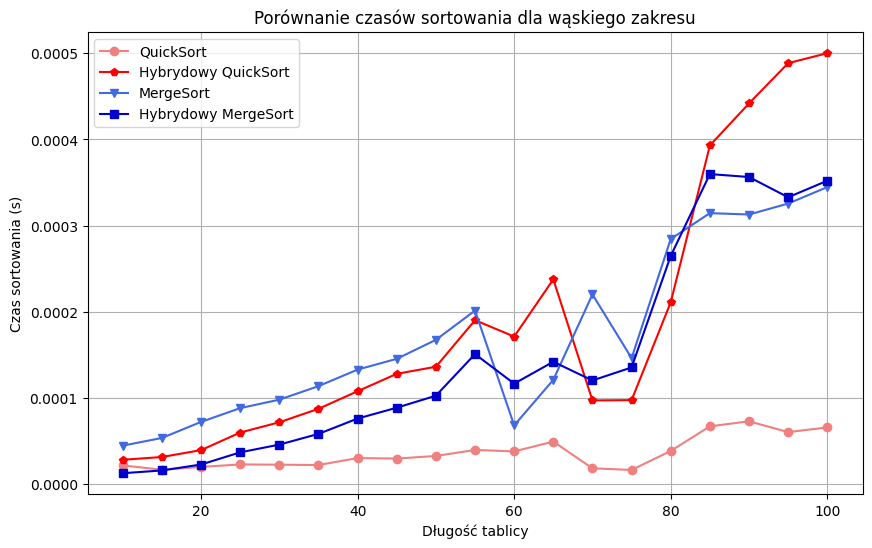

In [29]:
czasy_quick3 = []
czasy_h_quick3 = []
czasy_merge = []
czasy_h_merge = []

dlugosci = list(range(10, 101, 5))

for n in dlugosci:
    lista = [random.randint(1, 5) for _ in range(n)]
    
    kopia = lista[:]
    start = time.perf_counter()
    quick_sort3(kopia, 0, len(kopia) - 1)
    czasy_quick3.append(time.perf_counter() - start)
    
    kopia = lista[:]
    start = time.perf_counter()
    hybryd_quick_sort3(kopia,0, len(kopia)-1)
    czasy_h_quick3.append(time.perf_counter() - start)
    
    kopia = lista[:]
    start = time.perf_counter()
    Hybryd_MergeSort_w(kopia,0, len(kopia)-1)
    czasy_h_merge.append(time.perf_counter() - start)

    kopia = lista[:]
    start = time.perf_counter()
    MergeSort(kopia,0, len(kopia)-1)
    czasy_merge.append(time.perf_counter() - start)
    
      
plt.figure(figsize=(10, 6))
plt.plot(dlugosci, czasy_quick3, label='QuickSort', marker='o',color='lightcoral')
plt.plot(dlugosci, czasy_h_quick3, label='Hybrydowy QuickSort', marker='p',color='red')
plt.plot(dlugosci, czasy_merge, label='MergeSort', marker='v',color='royalblue' )
plt.plot(dlugosci, czasy_h_merge, label='Hybrydowy MergeSort', marker='s',color='mediumblue')

plt.title('Porównanie czasów sortowania dla wąskiego zakresu')
plt.xlabel('Długość tablicy')
plt.ylabel('Czas sortowania (s)')
plt.legend()
plt.grid(True) #linie siatki
plt.show()

In [30]:
# W przypadku wąskiego zakresu najbardziej efektywnym algorytmem sortowania jest zwykły QuickSort.

In [31]:
# D - MergeSort z wartownikami. Dodajemy na koniec każdej z posortowanych list 'dużą liczbę' (D) która jest większa niż dowolna
# wartość w tablicy. Zatem jeśli i lub j wyjdą poza granicy swoich list porównanie będzie dokonywane względem
# tej dużej liczby D, natomiast nierówność L[i] < D albo L[j] < D będzie zawsze prawdziwa.

In [32]:
def Merge_wart(rlist, left, middle, right):
    helper = []
    
    for k in range(left, middle + 1):
        helper.append(rlist[k])
        
    helper.append(10000000)
    
    for k in range(middle + 1, right + 1):
        helper.append(rlist[k])
    
    helper.append(10000000)
   
    i = 0
    j = middle - left + 2
    
    for k in range(left, len(helper)-2):
        if helper[i] <= helper[j]:
            rlist[left + k] = helper[i]
            i += 1
       
        else:
            rlist[left + k] = helper[j]
            j += 1
            
            
def MergeSortWart(lista, left, right): 
    if left >= right:
        return lista
    middle = (left + right) // 2
    MergeSortWart(lista, left, middle)
    MergeSortWart(lista, middle+1, right)
    Merge_wart(lista, left, middle, right)
    return lista


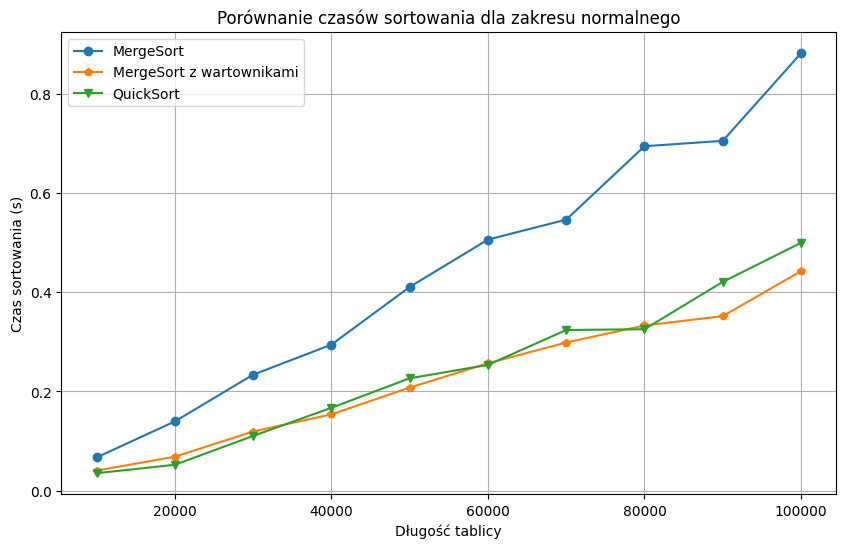

In [33]:
dlugosci = list(range(10000, 100001, 10000))
czasy_merge_wart = []
czasy_merge = []
czasy_quick = []


for n in dlugosci:
    lista = [random.randint(1, 1000000) for _ in range(n)]

    kopia = lista[:]
    start = time.perf_counter()
    MergeSort(kopia,0, len(kopia)-1)
    czasy_merge.append(time.perf_counter() - start)
    
    kopia = lista[:]
    start = time.perf_counter()
    MergeSortWart(kopia,0, len(kopia)-1)
    czasy_merge_wart.append(time.perf_counter() - start)

    kopia = lista[:]
    start = time.perf_counter()
    quick_sort(kopia, 0, len(kopia) - 1)
    czasy_quick.append(time.perf_counter() - start)
    
    
plt.figure(figsize=(10, 6))
plt.plot(dlugosci, czasy_merge, label='MergeSort', marker='o')
plt.plot(dlugosci, czasy_merge_wart, label='MergeSort z wartownikami', marker='p')
plt.plot(dlugosci, czasy_quick, label='QuickSort', marker='v')

plt.title('Porównanie czasów sortowania dla zakresu normalnego')
plt.xlabel('Długość tablicy')
plt.ylabel('Czas sortowania (s)')
plt.legend()
plt.grid(True) #linie siatki
plt.show()


In [34]:
# Z powyższego wykresu widać, że MergeSort z wartownikami jest znacznie szybszy niż zwykły MergeSort i nawet trochę szybszy niż QuickSort.

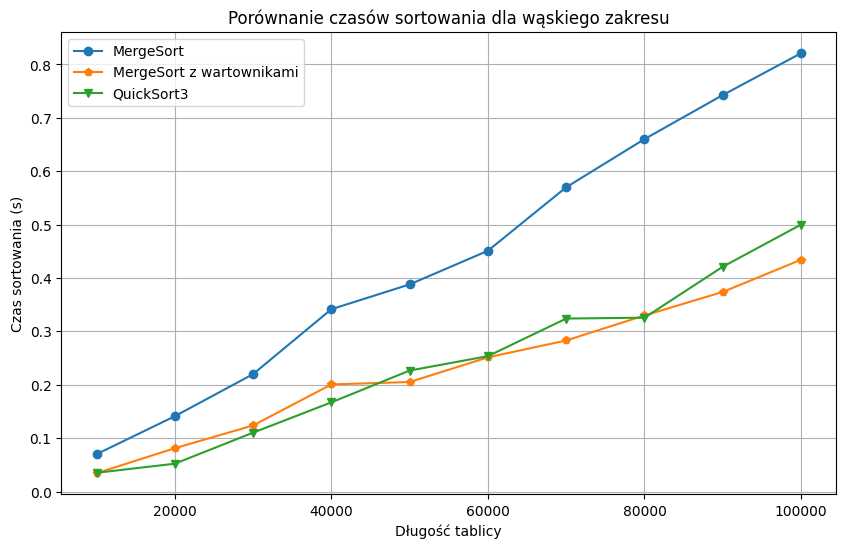

In [35]:
dlugosci = list(range(10000, 100001, 10000))
czasy_merge_wart = []
czasy_merge = []
czasy_quick3 = []


for n in dlugosci:
    lista = [random.randint(1, 5) for _ in range(n)]

    kopia = lista[:]
    start = time.perf_counter()
    MergeSort(kopia,0, len(kopia)-1)
    czasy_merge.append(time.perf_counter() - start)
    
    kopia = lista[:]
    start = time.perf_counter()
    MergeSortWart(kopia,0, len(kopia)-1)
    czasy_merge_wart.append(time.perf_counter() - start)

    kopia = lista[:]
    start = time.perf_counter()
    quick_sort3(kopia, 0, len(kopia) - 1)
    czasy_quick3.append(time.perf_counter() - start)
    
    
plt.figure(figsize=(10, 6))
plt.plot(dlugosci, czasy_merge, label='MergeSort', marker='o')
plt.plot(dlugosci, czasy_merge_wart, label='MergeSort z wartownikami', marker='p')
plt.plot(dlugosci, czasy_quick, label='QuickSort3', marker='v')

plt.title('Porównanie czasów sortowania dla wąskiego zakresu')
plt.xlabel('Długość tablicy')
plt.ylabel('Czas sortowania (s)')
plt.legend()
plt.grid(True) #linie siatki
plt.show()


In [36]:
# Natomiast dla wąskiego zakresu wyniki są podobne: MergeSort z wartownikami jest nadal o wiele szybszy niz zwykły MergeSort
# oraz QuickSort3.

In [37]:
# Wyniki:
# Dla zakresu normalnego i wąskiego oraz dla dużych tablic najlepiej sprawdzi się MergeSort z wartownikami albo zwykły QuickSort.
# Dla wąskiego zakresu i duzych tablic najlepiej sprawdzi się QuickSort.
# Dla wąskiego zakresu i małych tablic najlepipej sprawdzi sie Hybrydowy QuickSort.